<a href="https://colab.research.google.com/github/0128Chuks/-Bank-Customer-Segmentation-Groupwork/blob/main/Part_A_Data_cleaning_%26_RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part A (Data Understanding and RFM Segmentation)


In [46]:
import pandas as pd
import sqlite3

df_raw = pd.read_csv('/content/bank_transactions.csv')
df_raw.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/01/1994,F,JAMSHEDPUR,17819.05,02/08/2016,143207,25.0
1,T2,C2142763,04/04/1957,M,JHAJJAR,2270.69,02/08/2016,141858,27999.0
2,T3,C4417068,26/11/1996,F,MUMBAI,17874.44,02/08/2016,142712,459.0
3,T4,C5342380,14/09/1973,F,MUMBAI,866503.21,02/08/2016,142714,2060.0
4,T5,C9031234,24/03/1988,F,NAVI MUMBAI,6714.43,02/08/2016,181156,1762.5


In [47]:
df_raw['TransactionDate'] = pd.to_datetime(df_raw['TransactionDate'], format='%d/%m/%Y')
df_raw['CustomerDOB'] = pd.to_datetime(df_raw['CustomerDOB'], format='%d/%m/%Y', errors='coerce')
df_raw

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,2016-09-18,184824,799.0
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0


**Data Cleaning**

In [48]:
#null values
null_values = df_raw.isnull().sum()
print(null_values)

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64


In [49]:
percentage_null = (df_raw.isnull().sum() / len(df_raw)) * 100
print(percentage_null)

TransactionID              0.000000
CustomerID                 0.000000
CustomerDOB                0.323966
CustGender                 0.104905
CustLocation               0.014401
CustAccountBalance         0.225927
TransactionDate            0.000000
TransactionTime            0.000000
TransactionAmount (INR)    0.000000
dtype: float64


In [50]:
# Remove null values
df_cleaned = df_raw.dropna()
print("Shape after removing nulls:", df_cleaned.shape)

Shape after removing nulls: (1041614, 9)


**Removing Invaild Transactions**

In [51]:
# invalid transactions
invalid_transactions = df_cleaned[df_cleaned['TransactionAmount (INR)'] <= 0]
print("Invalid transactions found:", invalid_transactions.shape[0])
print(invalid_transactions.head())

Invalid transactions found: 820
     TransactionID CustomerID CustomerDOB CustGender CustLocation  \
384           T385   C6117158  1989-09-25          M    BANGALORE   
2498         T2499   C9074213  1988-06-10          M    BANGALORE   
2623         T2624   C7930692  1993-07-16          M    HYDERABAD   
2672         T2673   C4397046  1997-01-13          M       MUMBAI   
4083         T4084   C4227711  1991-12-03          M    NEW DELHI   

      CustAccountBalance TransactionDate  TransactionTime  \
384               128.84      2016-10-21            74817   
2498            15834.56      2016-10-21           154219   
2623             5795.30      2016-10-21           152742   
2672           185401.34      2016-10-21            30017   
4083            11846.77      2016-09-22            70059   

      TransactionAmount (INR)  
384                       0.0  
2498                      0.0  
2623                      0.0  
2672                      0.0  
4083                      

In [52]:
percentage_invalid = (invalid_transactions.shape[0] / df_cleaned.shape[0]) * 100
print(f"Percentage of invalid transactions: {percentage_invalid:.2f}%")

Percentage of invalid transactions: 0.08%


In [53]:
# transactions with zero or negative
df_valid = df_cleaned[df_cleaned['TransactionAmount (INR)'] > 0]
print("Shape after removing invalid transactions:", df_valid.shape)

Shape after removing invalid transactions: (1040794, 9)


**Filterring invalid dates**

In [54]:
# DOB after 2005
df_post_2005 = df_valid[df_valid['CustomerDOB'] > '2005-12-31']
print("Number of records with DOB after 2005:", df_post_2005.shape[0])
print(df_post_2005.head())

Number of records with DOB after 2005: 397
     TransactionID CustomerID CustomerDOB CustGender CustLocation  \
390           T391   C4417679  2021-01-19          M    NEW DELHI   
1328         T1329   C6417656  2021-01-19          M    NEW DELHI   
1667         T1668   C4217631  2021-01-19          M    NEW DELHI   
5491         T5492   C1213940  2007-12-02          M    CHANDAULI   
8173         T8174   C1017880  2013-02-20          M        DELHI   

      CustAccountBalance TransactionDate  TransactionTime  \
390           1125922.25      2016-10-21           202654   
1328          1125922.25      2016-10-21           192755   
1667          1125922.25      2016-10-21           195748   
5491            17728.06      2016-09-22            61944   
8173            20257.22      2016-09-25           191750   

      TransactionAmount (INR)  
390                   4570.00  
1328                  6300.00  
1667                  2460.00  
5491                 11499.00  
8173           

In [55]:
df_post_2005 = df_valid[df_valid['CustomerDOB'] > '2005-12-31']
num_records_post_2005 = df_post_2005.shape[0]
print("Number of records with DOB after 2005:", num_records_post_2005)

Number of records with DOB after 2005: 397


In [56]:
total_records = df_valid.shape[0]
percentage_post_2005 = (num_records_post_2005 / total_records) * 100
print(f"Percentage of records with DOB after 2005: {percentage_post_2005:.2f}%")

Percentage of records with DOB after 2005: 0.04%


In [57]:
# removing DOB after 2005
df_final = df_valid[df_valid['CustomerDOB'] <= '2005-12-31']
print("Shape after removing records with DOB after 2005:", df_final.shape)

Shape after removing records with DOB after 2005: (1040397, 9)


In [58]:
df_final.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5


In [59]:
df_dob_1800 = df_final[df_final['CustomerDOB'].dt.year == 1800]
percentage_1800_dobs = (len(df_dob_1800) / len(df_final)) * 100
print("Number of records with DOB in 1800:", len(df_dob_1800))
print(f"Percentage of records with DOB in 1800: {percentage_1800_dobs:.2f}%")

Number of records with DOB in 1800: 56180
Percentage of records with DOB in 1800: 5.40%


In [60]:
# Oldest valid DOB (excluding 1800)
dob_not_1800 = df_final[df_final['CustomerDOB'].dt.year != 1800]
print("Oldest valid DOB (excluding 1800):", dob_not_1800['CustomerDOB'].min())

Oldest valid DOB (excluding 1800): 1930-01-01 00:00:00


In [61]:
df_final.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5


In [62]:
import numpy as np

# Filter rows where year is 1800 because it's up to 5% of the total entry
year_1800 = df_final['CustomerDOB'].dt.year == 1800

# Get mode year (excluding 1800)
mode_year = (
    df_final[~year_1800]['CustomerDOB'].dt.year.mode()[0]
)
print(f"Mode year for DOB: {mode_year}")

# Generate random months (1-12) and days (1-28 to avoid invalid dates)
random_months = np.random.randint(1, 13, size=year_1800.sum())
random_days = np.random.randint(1, 29, size=year_1800.sum())  # Safe days

# Create a list of new randomized dates
random_dates = [
    pd.Timestamp(year=mode_year, month=m, day=d)
    for m, d in zip(random_months, random_days)
]

# Assign the new randomized dates back to the filtered rows
df_final.loc[year_1800, 'CustomerDOB'] = random_dates

print("1800-DOBs replaced. New shape:", df_final.shape)
df_final['CustomerDOB'].dt.year.value_counts().sort_index()

Mode year for DOB: 1990
1800-DOBs replaced. New shape: (1040397, 9)


,count
CustomerDOB,
1930,63
1931,73
1932,79
1933,73
1934,67
...,...
2001,140
2002,96
2003,69


In [63]:
df_final['CustomerDOB'] = df_final['CustomerDOB'].dt.date
df_final['TransactionDate'] = df_final['TransactionDate'].dt.date

<ipython-input-63-91061d78fd80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['CustomerDOB'] = df_final['CustomerDOB'].dt.date
<ipython-input-63-91061d78fd80>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['TransactionDate'] = df_final['TransactionDate'].dt.date


In [64]:
df_final.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.040397e+06,1.040397e+06,1.040397e+06
mean,1.148619e+05,1.571721e+05,1.566550e+03
std,8.465236e+05,5.123047e+04,6.562406e+03
min,0.000000e+00,0.000000e+00,1.000000e-02
25%,4.726860e+03,1.241040e+05,1.613100e+02
50%,1.675289e+04,1.643050e+05,4.580000e+02
75%,5.738553e+04,2.000290e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [65]:
df_final

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,2016-09-18,184824,799.0
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0


In [66]:
# Group by CustomerID and count unique DOBs
dob_variation = df_final.groupby('CustomerID')['CustomerDOB'].nunique()

# Filtering CustomerIDs with more than 1 unique DOB
inconsistent_ids = dob_variation[dob_variation > 1]
print("Number of inconsistent CustomerIDs with multiple DOBs:", inconsistent_ids.shape[0])

# inconsistent records
if inconsistent_ids.shape[0] > 0:
    inconsistent_records = df_final[df_final['CustomerID'].isin(inconsistent_ids.index)]
    print(inconsistent_records.sort_values(['CustomerID', 'CustomerDOB']).head(10))

Number of inconsistent CustomerIDs with multiple DOBs: 140810
       TransactionID CustomerID CustomerDOB CustGender CustLocation  \
173508       T173509   C1010011  1983-08-05          M    NEW DELHI   
33670         T33671   C1010011  1992-08-19          F        NOIDA   
251647       T251648   C1010014  1984-08-19          M       MUMBAI   
89543         T89544   C1010014  1992-06-04          F       MUMBAI   
50880         T50881   C1010031  1984-07-21          M         VAPI   
169854       T169855   C1010031  1988-06-09          M       TRICHY   
560675       T560676   C1010035  1980-06-09          M  NAVI MUMBAI   
87413         T87414   C1010035  1992-03-02          M       MUMBAI   
113532       T113533   C1010041  1975-09-14          F        NOIDA   
888199       T888200   C1010041  1992-07-13          F        LOHIT   

        CustAccountBalance TransactionDate  TransactionTime  \
173508           120180.54      2016-08-09            11229   
33670             32500.73    

In [67]:
total_customers = df_final['CustomerID'].nunique()
inconsistent_customers = df_final.groupby('CustomerID')['CustomerDOB'].nunique()
inconsistent_customers = inconsistent_customers[inconsistent_customers > 1]
percentage_inconsistent = (len(inconsistent_customers) / total_customers) * 100
print("Number of inconsistent CustomerIDs:", len(inconsistent_customers))
print("Total unique CustomerIDs:", total_customers)
print(f"Percentage of inconsistent CustomerIDs: {percentage_inconsistent:.2f}%")

Number of inconsistent CustomerIDs: 140810
Total unique CustomerIDs: 878478
Percentage of inconsistent CustomerIDs: 16.03%


**Creating a new customer ID**

In [68]:
# Creating a new customer ID
df_final['CustomerDOB'] = pd.to_datetime(df_final['CustomerDOB'], errors='coerce')
df_final['NewCustomerID'] = (
    df_final['CustomerID'].astype(str) + '_' +
    df_final['CustomerDOB'].astype(str) + '_' +
    df_final['CustGender'].astype(str)
)

<ipython-input-68-842c6daa5830>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['CustomerDOB'] = pd.to_datetime(df_final['CustomerDOB'], errors='coerce')
<ipython-input-68-842c6daa5830>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['NewCustomerID'] = (


In [69]:
print("Total New customers:", df_final['NewCustomerID'].nunique())
print("Sample IDs:\n", df_final['NewCustomerID'].head())

Total New customers: 1039183
Sample IDs:
 0    C5841053_1994-01-10_F
1    C2142763_1957-04-04_M
2    C4417068_1996-11-26_F
3    C5342380_1973-09-14_F
4    C9031234_1988-03-24_F
Name: NewCustomerID, dtype: object


In [70]:
df_final.head(10)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),NewCustomerID
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.00,C5841053_1994-01-10_F
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.00,C2142763_1957-04-04_M
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.00,C4417068_1996-11-26_F
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.00,C5342380_1973-09-14_F
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.50,C9031234_1988-03-24_F
5,T6,C1536588,1972-10-08,F,ITANAGAR,53609.20,2016-08-02,173940,676.00,C1536588_1972-10-08_F
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-08-02,173806,566.00,C7126560_1992-01-26_F
7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2016-08-02,170537,148.00,C1220223_1982-01-27_M
8,T9,C8536061,1988-04-19,F,GURGAON,14906.96,2016-08-02,192825,833.00,C8536061_1988-04-19_F
9,T10,C6638934,1984-06-22,M,MUMBAI,4279.22,2016-08-02,192446,289.11,C6638934_1984-06-22_M


**Cleaning the Customer Location**

In [71]:
# Checking the total number of entries (including NaN) in 'CustLocation'
total_entries = df_final['CustLocation'].shape[0]

# Number of non-null entries
non_null_entries = df_final['CustLocation'].count()

# Number of null entries
missing_entries = df_final['CustLocation'].isnull().sum()

# Number of unique entries (excluding NaN)
unique_entries = df_final['CustLocation'].nunique(dropna=True)

print("Total entries in 'CustLocation':", total_entries)
print("Non-null entries in 'CustLocation':", non_null_entries)
print("Missing entries in 'CustLocation':", missing_entries)
print("Unique entries in 'CustLocation':", unique_entries)

Total entries in 'CustLocation': 1040397
Non-null entries in 'CustLocation': 1040397
Missing entries in 'CustLocation': 0
Unique entries in 'CustLocation': 9267


In [72]:
count_400012 = df_final[df_final['CustLocation'] == '400012'].shape[0]
print("Number of records with CustLocation = '400012':", count_400012)

Number of records with CustLocation = '400012': 2


In [73]:
df_final = df_final[df_final['CustLocation'] != '400012']
print("Remaining rows after dropping '400012':", df_final.shape[0])

Remaining rows after dropping '400012': 1040395


In [74]:
dot_dash = df_final[df_final['CustLocation'].str.contains(r'\.-', na=False)]
print("Locations containing '.-':", dot_dash.shape[0])

Locations containing '.-': 36


In [75]:
# Removing ".-"
df_final['CustLocation'] = df_final['CustLocation'].str.replace('.-', '', regex=False)

<ipython-input-75-18794e9840c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['CustLocation'] = df_final['CustLocation'].str.replace('.-', '', regex=False)


In [76]:
# Checking if any '.-' still exists
print("Remaining with '.-':", df_final['CustLocation'].str.contains(r'\.-', na=False).sum())

Remaining with '.-': 0


In [77]:
dot= df_final[df_final['CustLocation'] == '.']
print("Exact '.' count:", dot.shape[0])

Exact '.' count: 86


In [78]:
df_final.loc[df_final['CustLocation'] == '.', 'CustLocation'] = 'PURAM, BANGALORE'

In [79]:
#reomving parenthesis
df_final['CustLocation'] = df_final['CustLocation'].str.replace(r'\(.*?\)', '', regex=True).str.strip()
df_final[['CustomerID', 'CustLocation']].head(10)

<ipython-input-79-4d7deafd82b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['CustLocation'] = df_final['CustLocation'].str.replace(r'\(.*?\)', '', regex=True).str.strip()


,CustomerID,CustLocation
0,C5841053,JAMSHEDPUR
1,C2142763,JHAJJAR
2,C4417068,MUMBAI
3,C5342380,MUMBAI
4,C9031234,NAVI MUMBAI
5,C1536588,ITANAGAR
6,C7126560,MUMBAI
7,C1220223,MUMBAI
8,C8536061,GURGAON
9,C6638934,MUMBAI


In [80]:
#null values
null_values = df_final.isnull().sum()
print(null_values)

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
NewCustomerID              0
dtype: int64


In [81]:
# Replace empty strings and pure spaces with actual NaN values in df_final
df_final.replace(r'^\s*$', pd.NA, regex=True, inplace=True)

# check nulls
null_counts = df_final.isnull().sum()
print("Null counts per column (after replacing blanks):")
print(null_counts[null_counts > 0])

<ipython-input-81-fdfa6376716d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.replace(r'^\s*$', pd.NA, regex=True, inplace=True)


Null counts per column (after replacing blanks):
CustLocation    5
dtype: int64


In [82]:
# Drop nulls
df_final = df_final.dropna(subset=['CustLocation'])
# check nulls
null_counts_after = df_final.isnull().sum()
null_counts_after[null_counts_after > 0]

,0


In [83]:
import re
# locations that start with a number
starts_with_number = df_final[df_final['CustLocation'].str.match(r'^\d', na=False)]

print("Number of locations that start with a number:", starts_with_number.shape[0])
print(starts_with_number['CustLocation'].value_counts().head(10))

Number of locations that start with a number: 799
CustLocation
9A MALLESHWARAM BANGALORE             145
24 PGNS NORTH                          75
21A FARIDABAD                          67
39 OPP HSBC BUILDING GURGAON           29
24 PGS N                               28
3IGI AIRPORT DELHI                     26
24 PARGANAS                            25
1ST BLOCK BANGALORE                    22
1ST BLK JAKKASANDRA BANGALORE          21
2 THAKUR VILLAGE KANDIVALI  MUMBAI     16
Name: count, dtype: int64


In [84]:
df_final['NewCustomerID'].isnull().sum()

np.int64(0)

In [85]:
df_final['NewCustomerID'].nunique()

1039176

In [86]:
df_final.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),NewCustomerID
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,C5841053_1994-01-10_F
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,C2142763_1957-04-04_M
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,C4417068_1996-11-26_F
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,C5342380_1973-09-14_F
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,C9031234_1988-03-24_F


In [87]:
df_final.to_csv('bank_cleaned.csv', index=False)

In [88]:
conn = sqlite3.connect("bank_cleaned.sqlite")
cur = conn.cursor()
df_final.to_sql("clean_bank_data", conn, if_exists='replace', index=False)

print("Shape of the SQL table:", df_final.shape)

df_check = pd.read_sql("SELECT * FROM clean_bank_data LIMIT 5", conn)
df_check

Shape of the SQL table: (1040390, 10)


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),NewCustomerID
0,T1,C5841053,1994-01-10 00:00:00,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,C5841053_1994-01-10_F
1,T2,C2142763,1957-04-04 00:00:00,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,C2142763_1957-04-04_M
2,T3,C4417068,1996-11-26 00:00:00,F,MUMBAI,17874.44,2016-08-02,142712,459.0,C4417068_1996-11-26_F
3,T4,C5342380,1973-09-14 00:00:00,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,C5342380_1973-09-14_F
4,T5,C9031234,1988-03-24 00:00:00,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,C9031234_1988-03-24_F


**Top 5 Locations**

In [89]:
df_final['CityGuess'] = df_final['CustLocation'].apply(lambda x: str(x).split()[-1])
df_final.to_sql("clean_bank_data", conn, if_exists='replace', index=False)
query = """
SELECT
    CityGuess,
    COUNT(*) AS TransactionCount
FROM clean_bank_data
GROUP BY CityGuess
ORDER BY TransactionCount DESC
LIMIT 5;
"""
top_locations_sql = pd.read_sql(query, conn)
print("Top 5 Locations by Number of Transactions:")
print(top_locations_sql)

Top 5 Locations by Number of Transactions:
   CityGuess  TransactionCount
0      DELHI            156603
1     MUMBAI            132031
2  BANGALORE             88781
3    GURGAON             74204
4      NOIDA             36122


**RFM**

In [90]:
# Define a snapshot date (1 day after the latest transaction)
snapshot_date = df_final['TransactionDate'].max() + pd.Timedelta(days=1)

# Group and calculate RFM
rfm = df_final.groupby('NewCustomerID').agg({
    'TransactionDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'TransactionID': 'count',                                     # Frequency
    'TransactionAmount (INR)': 'sum'                              # Monetary
}).reset_index()
print(rfm.head())

           NewCustomerID  TransactionDate  TransactionID  \
0  C1010011_1983-08-05_M               74              1   
1  C1010011_1992-08-19_F               26              1   
2  C1010012_1994-07-28_M               69              1   
3  C1010014_1984-08-19_M               76              1   
4  C1010014_1992-06-04_F               82              1   

   TransactionAmount (INR)  
0                    356.0  
1                   4750.0  
2                   1499.0  
3                    250.0  
4                   1205.0  


In [91]:
print("rfm shape:", rfm.shape)

rfm shape: (1039176, 4)


In [92]:
  rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
  print(rfm.head())

              CustomerID  Recency  Frequency  Monetary
0  C1010011_1983-08-05_M       74          1     356.0
1  C1010011_1992-08-19_F       26          1    4750.0
2  C1010012_1994-07-28_M       69          1    1499.0
3  C1010014_1984-08-19_M       76          1     250.0
4  C1010014_1992-06-04_F       82          1    1205.0


In [93]:
rfm.to_csv('rfm.csv', index=False)

In [94]:
rfm.Frequency.value_counts()

,count
Frequency,
1,1037966
2,1206
3,4


**Plotting and Visualizaing**

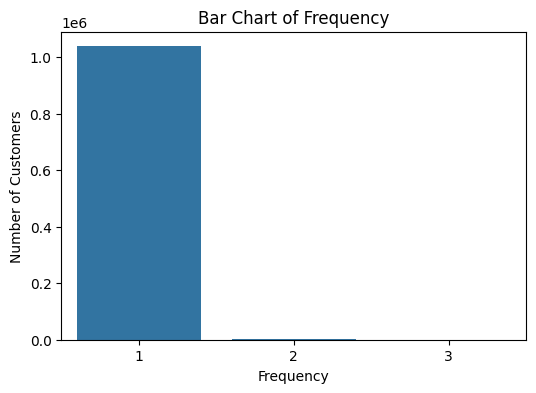

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart for Frequency
freq_counts = rfm['Frequency'].value_counts().sort_index()
plt.figure(figsize=(6, 4))
sns.barplot(x=freq_counts.index, y=freq_counts.values)
plt.xlabel('Frequency')
plt.ylabel('Number of Customers')
plt.title('Bar Chart of Frequency')
plt.show()

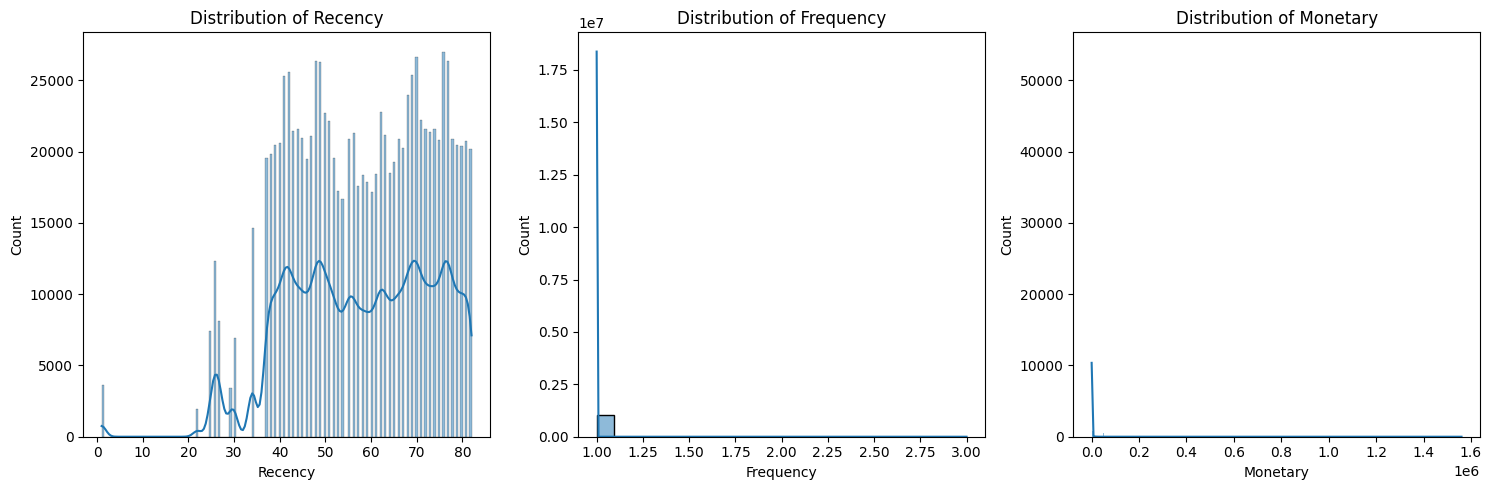

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Plot histograms
plt.figure(figsize=(15, 5))

for i, col in enumerate(['Recency', 'Frequency', 'Monetary'], 1):
    plt.subplot(1, 3, i)
    sns.histplot(rfm[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

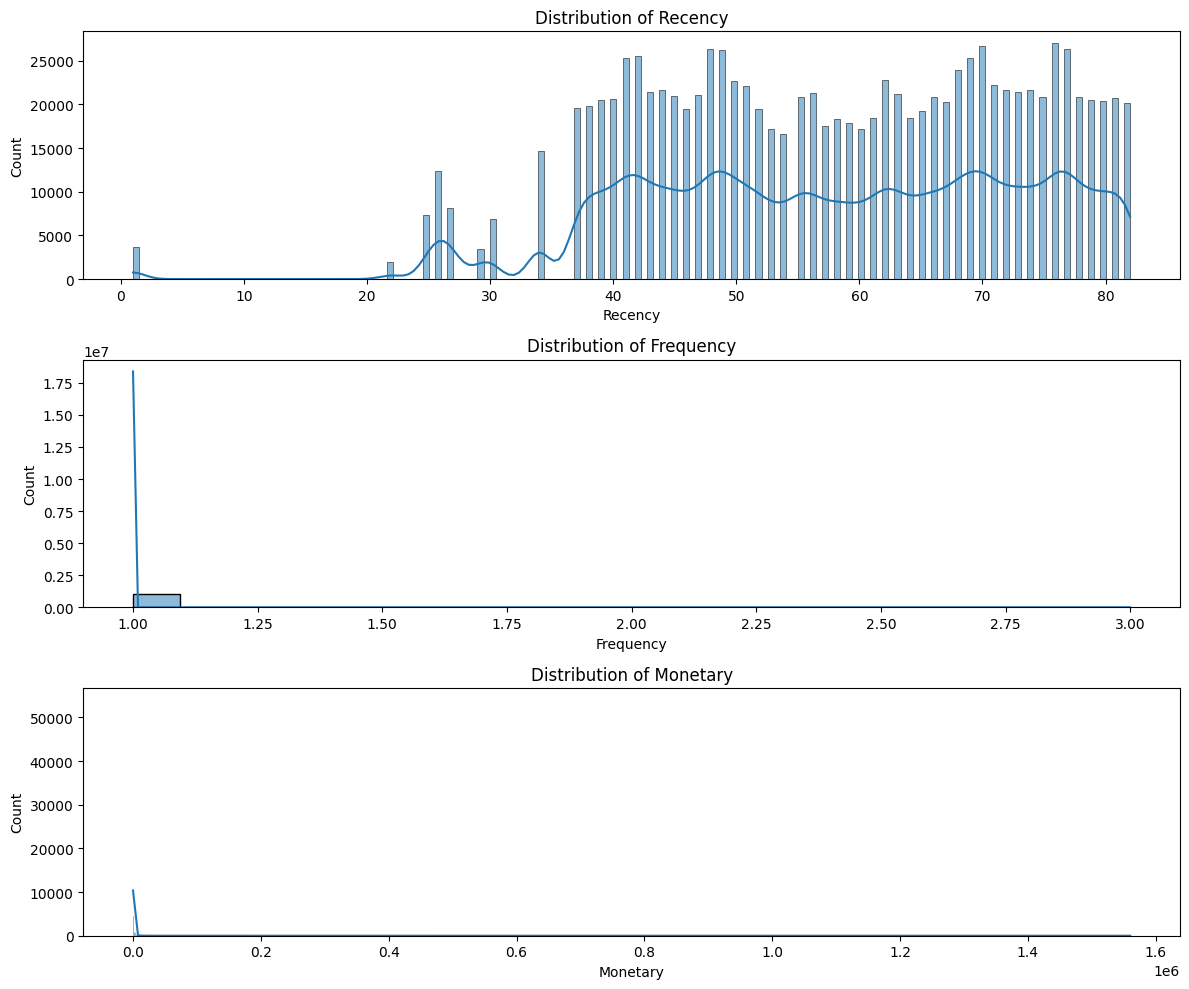

In [97]:
plt.figure(figsize=(12, 10))

# Plot distribution of Recency
plt.subplot(3, 1, 1)
sns.histplot(rfm['Recency'], kde=True)
plt.title('Distribution of Recency')

# Plot distribution of Frequency
plt.subplot(3, 1, 2)
sns.histplot(rfm['Frequency'], kde=True)
plt.title('Distribution of Frequency')

# Plot distribution of Monetary
plt.subplot(3, 1, 3)
sns.histplot(rfm['Monetary'], kde=True)
plt.title('Distribution of Monetary')

plt.tight_layout()
plt.show()

**Skewness**

In [98]:
#Skewness for each metric
recency_skew = rfm['Recency'].skew()
frequency_skew = rfm['Frequency'].skew()
monetary_skew = rfm['Monetary'].skew()

print("Skewness of Recency:", recency_skew)
print("Skewness of Frequency:", frequency_skew)
print("Skewness of Monetary:", monetary_skew)

Skewness of Recency: -0.31767983792871574
Skewness of Frequency: 29.49250561631165
Skewness of Monetary: 47.80859284401931


   Recency_log  Frequency_log  Monetary_log
0     4.317488       0.693147      5.877736
1     3.295837       0.693147      8.466110
2     4.248495       0.693147      7.313220
3     4.343805       0.693147      5.525453
4     4.418841       0.693147      7.095064


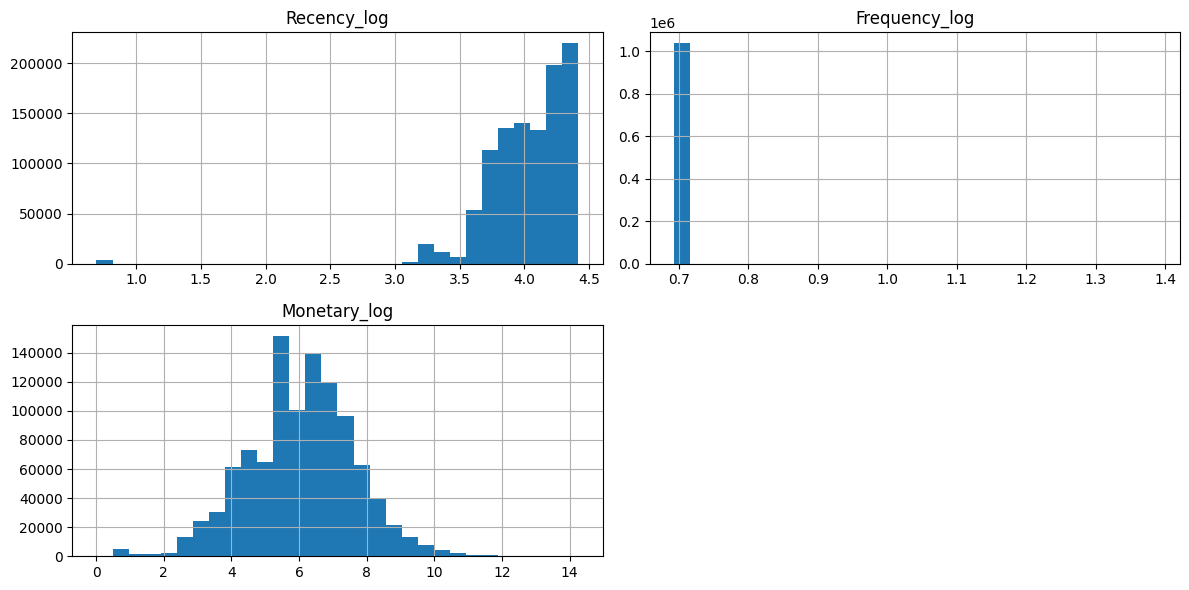

In [99]:
import numpy as np

rfm['Recency_log'] = np.log1p(rfm['Recency'])
rfm['Frequency_log'] = np.log1p(rfm['Frequency'])
rfm['Monetary_log'] = np.log1p(rfm['Monetary'])
print(rfm[['Recency_log', 'Frequency_log', 'Monetary_log']].head())

#log-transformed histograms
rfm[['Recency_log', 'Frequency_log', 'Monetary_log']].hist(bins=30, figsize=(12, 6))
plt.tight_layout()
plt.show()

In [100]:
# RFM table with original and log-transformed metrics
rfm.to_csv("rfm_log_transformed.csv", index=False)

In [101]:
from sklearn.preprocessing import MinMaxScaler
log_rfm = rfm[['CustomerID', 'Recency_log', 'Frequency_log', 'Monetary_log']].copy()

# Scaling the log-transformed columns
scaler = MinMaxScaler()
log_rfm[['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled']] = scaler.fit_transform(
    log_rfm[['Recency_log', 'Frequency_log', 'Monetary_log']]
)

log_rfm.to_csv("rfm_scaled.csv", index=False)
log_rfm.head()

,CustomerID,Recency_log,Frequency_log,Monetary_log,Recency_scaled,Frequency_scaled,Monetary_scaled
0,C1010011_1983-08-05_M,4.317488,0.693147,5.877736,0.972796,0.0,0.411767
1,C1010011_1992-08-19_F,3.295837,0.693147,8.466110,0.698579,0.0,0.593404
2,C1010012_1994-07-28_M,4.248495,0.693147,7.313220,0.954278,0.0,0.512501
3,C1010014_1984-08-19_M,4.343805,0.693147,5.525453,0.979860,0.0,0.387046
4,C1010014_1992-06-04_F,4.418841,0.693147,7.095064,1.000000,0.0,0.497192


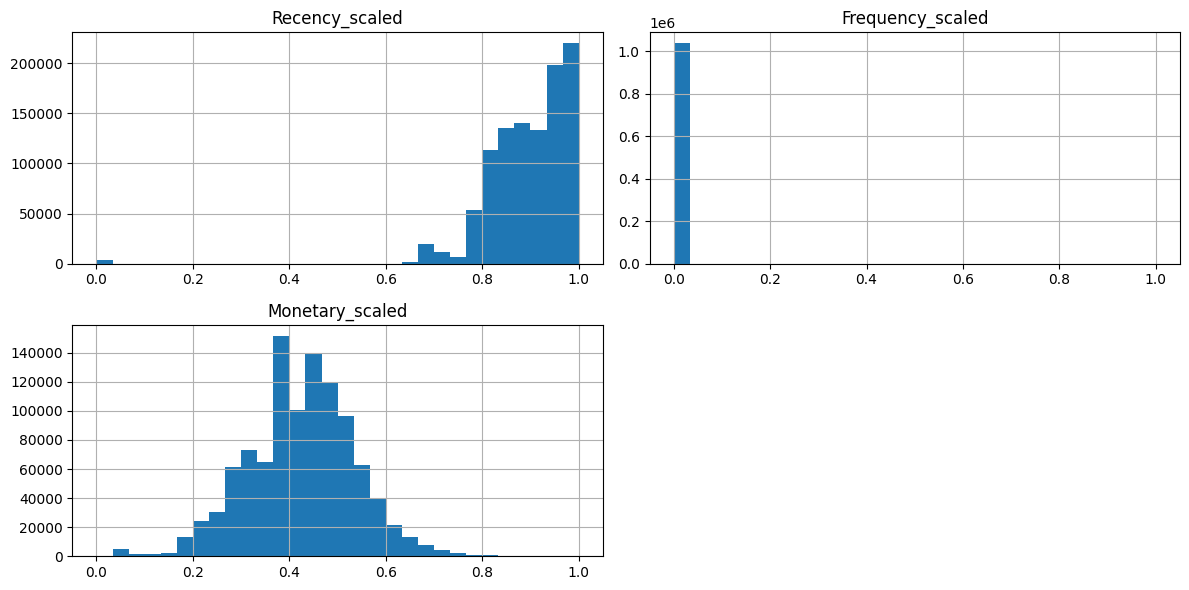

In [102]:
log_rfm[['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled']].hist(
    bins=30, figsize=(12, 6)
)
plt.tight_layout()
plt.show()

In [103]:
rfm.to_csv('rfm_scaled.csv', index=False)

# Export for Part C Analysis

Build RFM which includes Location to create a data set that can be filtered

In [104]:
# Making sure transaction dates are parsed
df_final['TransactionDate'] = pd.to_datetime(df_final['TransactionDate'], errors='coerce')

# Define a snapshot date (1 day after the latest transaction)
snapshot_date = df_final['TransactionDate'].max() + pd.Timedelta(days=1)

# Group and calculate RFM
rfm_incl_location = df_final.groupby(['NewCustomerID', 'CityGuess']).agg({
    'TransactionDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'TransactionID': 'count',                                     # Frequency
    'TransactionAmount (INR)': 'sum'                              # Monetary
}).reset_index()
print(rfm_incl_location.head())

           NewCustomerID CityGuess  TransactionDate  TransactionID  \
0  C1010011_1983-08-05_M     DELHI               74              1   
1  C1010011_1992-08-19_F     NOIDA               26              1   
2  C1010012_1994-07-28_M    MUMBAI               69              1   
3  C1010014_1984-08-19_M    MUMBAI               76              1   
4  C1010014_1992-06-04_F    MUMBAI               82              1   

   TransactionAmount (INR)  
0                    356.0  
1                   4750.0  
2                   1499.0  
3                    250.0  
4                   1205.0  


In [105]:
print("rfm shape:", rfm_incl_location.shape)

rfm shape: (1039192, 5)


In [106]:
rfm_incl_location.columns = ['CustomerID', 'CityGuess','Recency', 'Frequency', 'Monetary']
print(rfm_incl_location.head())

              CustomerID CityGuess  Recency  Frequency  Monetary
0  C1010011_1983-08-05_M     DELHI       74          1     356.0
1  C1010011_1992-08-19_F     NOIDA       26          1    4750.0
2  C1010012_1994-07-28_M    MUMBAI       69          1    1499.0
3  C1010014_1984-08-19_M    MUMBAI       76          1     250.0
4  C1010014_1992-06-04_F    MUMBAI       82          1    1205.0


In [107]:
rfm_incl_location.to_csv('/content/rfm_incl_location.csv')